In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [29]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [31]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [32]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [33]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [34]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
#Rename colums
df.rename(columns={'Na_to_K' : 'Sodium_to_Potassium','BP' : 'Blood_Presure'},inplace=True)
df['Sex'].replace({'M':'Male','F' : 'Female'},inplace=True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)

C:\Users\HKP\AppData\Local\Temp\ipykernel_11488\1010826563.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'M':'Male','F' : 'Female'},inplace=True)


In [37]:
df

,Age,Sex,Blood_Presure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


In [38]:
# Thống kê số lượng ng thuộc 5 nhóm tuổi cao nhất

age_values= df['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd.DataFrame({'Age': top_age.index,'Count' : top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,32,6


C:\Users\HKP\AppData\Local\Temp\ipykernel_11488\3221459393.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x,data=data,palette=palette,ax=ax)
C:\Users\HKP\AppData\Local\Temp\ipykernel_11488\3221459393.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x,data=data,palette=palette,ax=ax)
C:\Users\HKP\AppData\Local\Temp\ipykernel_11488\3221459393.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x,data=data,palette=palette,ax=ax)
C:\Users\HKP\AppData\Local\Temp\ipykernel_11488\3221459393.py:4: FutureWarning: 

Passing `palett

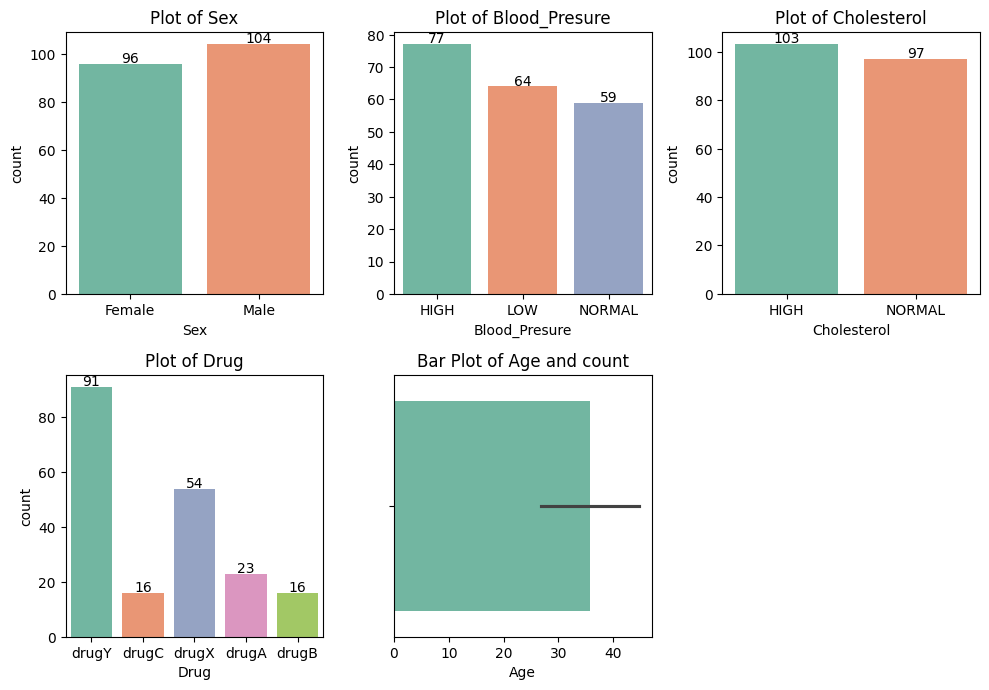

In [39]:
#EDA
def create_plot(ax,x,data,plot_type='count',y=None,palette='Set2'):
    if plot_type == 'count':
        sns.countplot(x=x,data=data,palette=palette,ax=ax)
    elif plot_type == 'bar':
        sns.barplot(x=x,data=data,palette=palette,ax=ax)
    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2.,p.get_height()),
                    ha='center',va='baseline',
                    fontsize=10,color='black',
                    xytext=(0,1),
                    textcoords='offset points')
#Create the figure and subplots'
plt.figure(figsize=(10,10))

# Define plot configurations
plot_configs = [
    {'x':'Sex','data': df,'plot_type':'count'},
    {'x':'Blood_Presure','data': df,'plot_type':'count'},
    {'x':'Cholesterol','data': df,'plot_type':'count'},
    {'x':'Drug','data': df,'plot_type':'count'},
    {'x':'Age','y' : 'count','data': df_top_age,'plot_type':'bar'}
]

#Loop through plot 
for i,config in enumerate(plot_configs):
    ax = plt.subplot(3,3,i+1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()

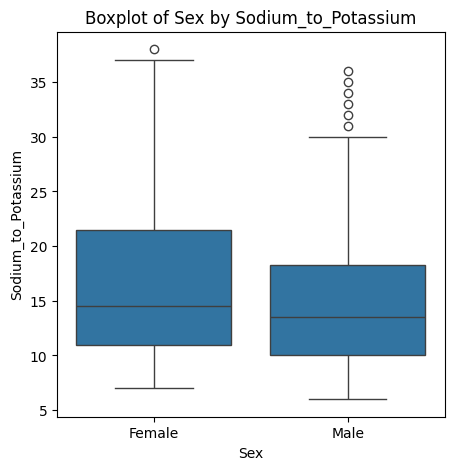

In [40]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Sex',y='Sodium_to_Potassium',data=df)
plt.title('Boxplot of Sex by Sodium_to_Potassium')
plt.show()

In [41]:
#Feature and target

x= df.iloc[:,:-1]
y= df.iloc[:,-1]
x

,Age,Sex,Blood_Presure,Cholesterol,Sodium_to_Potassium
0,23,Female,HIGH,HIGH,25
1,47,Male,LOW,HIGH,13
2,47,Male,LOW,HIGH,10
3,28,Female,NORMAL,HIGH,8
4,61,Female,LOW,HIGH,18
...,...,...,...,...,...
195,56,Female,LOW,HIGH,12
196,16,Male,LOW,HIGH,12
197,52,Male,NORMAL,HIGH,10
198,23,Male,NORMAL,NORMAL,14


In [42]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [43]:


print(x.columns)

Index(['Age', 'Sex', 'Blood_Presure', 'Cholesterol', 'Sodium_to_Potassium'], dtype='object')


In [44]:
# OneHotEncoder cho cột 'Sex'
onehot_encoder_sex = OneHotEncoder(sparse_output=False)
one_hot_encoder = onehot_encoder_sex.fit_transform(x[['Sex']])

# Tạo DataFrame với các tên cột tương ứng
one_hot_df = pd.DataFrame(one_hot_encoder, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))

# Gắn thêm vào DataFrame ban đầu và loại bỏ cột 'Sex' cũ
x = pd.concat([x, one_hot_df], axis=1)
x = x.drop('Sex', axis=1)

# LabelEncoder cho các cột 'Blood_Presure' và 'Cholesterol'
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
x['Blood_Presure'] = labelled_encoder_blood_pressure.fit_transform(x['Blood_Presure'])
x['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(x['Cholesterol'])

# In kết quả DataFrame đã được xử lý
print(x)


     Age  Blood_Presure  Cholesterol  Sodium_to_Potassium  Sex_Female  \
0     23              0            0                   25         1.0   
1     47              1            0                   13         0.0   
2     47              1            0                   10         0.0   
3     28              2            0                    8         1.0   
4     61              1            0                   18         1.0   
..   ...            ...          ...                  ...         ...   
195   56              1            0                   12         1.0   
196   16              1            0                   12         0.0   
197   52              2            0                   10         0.0   
198   23              2            1                   14         0.0   
199   40              1            1                   11         1.0   

     Sex_Male  
0         0.0  
1         1.0  
2         1.0  
3         0.0  
4         0.0  
..        ...  
195       0

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


In [46]:
x_train

,Age,Blood_Presure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
2,47,1,0,10,0.0,1.0
77,26,0,1,19,1.0,0.0
46,37,0,0,13,1.0,0.0
187,47,0,0,10,0.0,1.0
191,23,0,0,8,0.0,1.0
...,...,...,...,...,...,...
106,22,2,0,12,0.0,1.0
14,50,2,0,13,1.0,0.0
92,29,0,0,29,1.0,0.0
179,67,2,0,16,1.0,0.0


In [47]:
x_test

,Age,Blood_Presure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
95,36,1,1,11,0.0,1.0
15,16,0,1,16,1.0,0.0
30,18,2,1,9,1.0,0.0
158,59,1,0,10,1.0,0.0
128,47,1,1,34,0.0,1.0
...,...,...,...,...,...,...
113,65,1,1,14,1.0,0.0
26,31,0,0,30,0.0,1.0
139,69,2,0,10,1.0,0.0
100,31,0,1,12,0.0,1.0


In [48]:
dtc= DecisionTreeClassifier(criterion="entropy",max_depth=6,max_leaf_nodes=10)

In [49]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [50]:
dtc.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

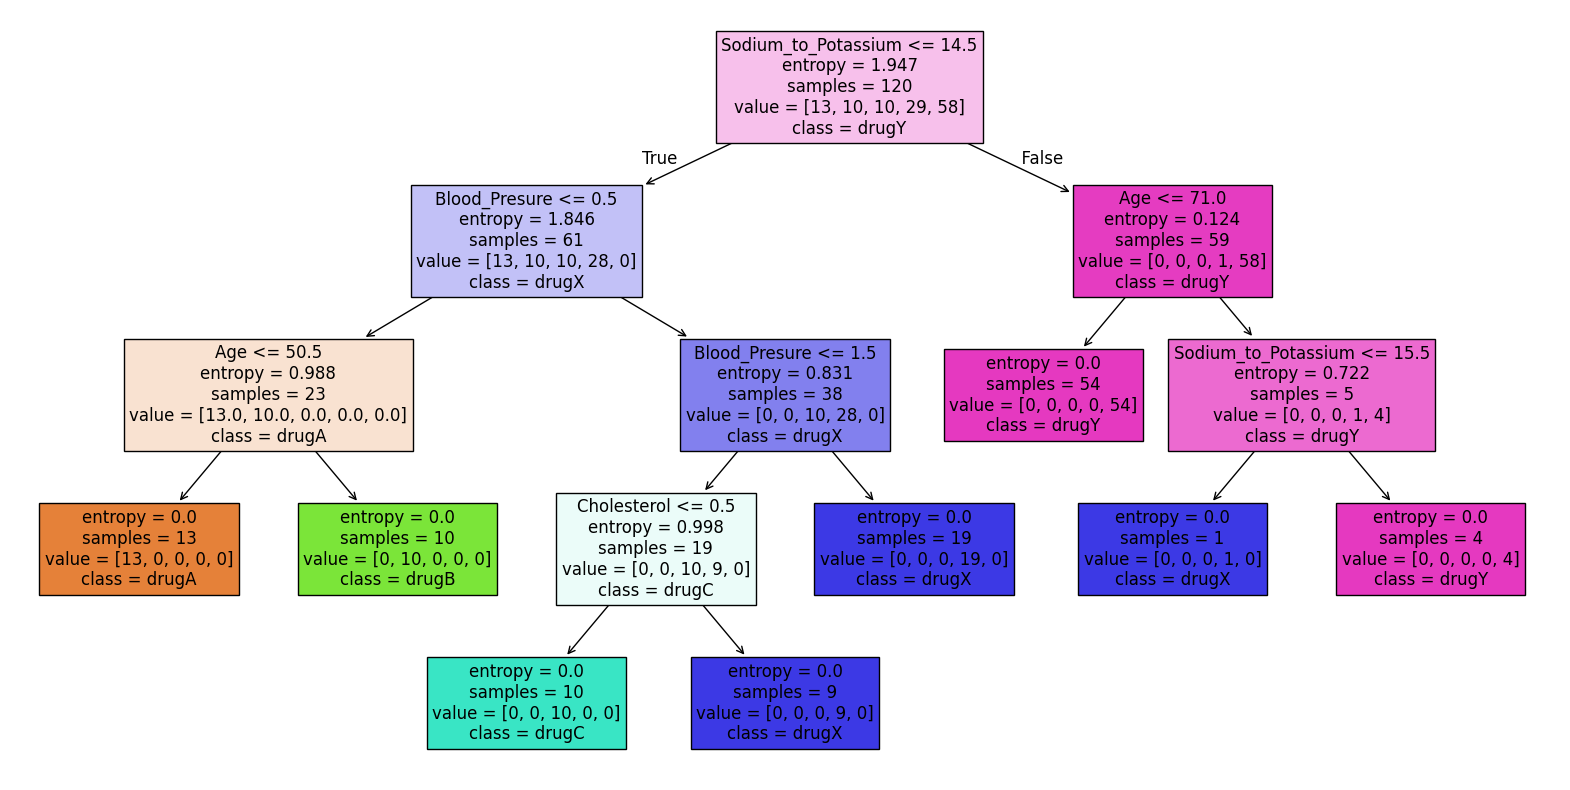

In [51]:
from sklearn.tree import plot_tree
feature_cols=x_train.columns
plt.figure(figsize=(20,10))
plot_tree(dtc,class_names=dtc.classes_,feature_names=feature_cols,fontsize=12,filled=True)
plt.show()

In [52]:
#Tính entropy có trọng số(WE) và Information gain khi phân tách Root thành Left - Right node

In [53]:
#Accuracy score
#Predict the response
y_test_pred=dtc.predict(x_test)

#Model Accuracy,how often is the classifier correct?
print("Accuracy:",100*metrics.accuracy_score(y_test,y_test_pred))

Accuracy: 98.75


In [54]:
#Tạo confusion - Metric
from sklearn.metrics import confusion_matrix
cf_matrix= confusion_matrix(y_test,y_test_pred)

cf_matrix

array([[10,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  1, 32]])

Text(0.5, 1.0, 'Confution Matric')

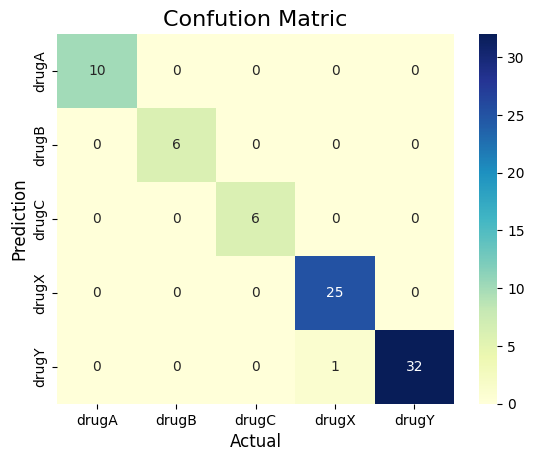

In [55]:
#Plot the confusion matrics
sns.heatmap(cf_matrix,annot=True,fmt='d',cmap='YlGnBu',xticklabels=dtc.classes_,yticklabels=dtc.classes_)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confution Matric',fontsize=16)

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score

accuracy= accuracy_score(y_test,y_test_pred)
print(accuracy)

precision=precision_score(y_test,y_test_pred,average=None)
print(precision)

recall=recall_score(y_test,y_test_pred,average=None)
print(recall)


f1=f1_score(y_test,y_test_pred,average=None)
print(f1)

f0_5=fbeta_score(y_test,y_test_pred,beta=0.5,average=None)
print(f0_5)

f2=fbeta_score(y_test,y_test_pred,beta=2,average=None)
print(f2)


0.9875
[1.         1.         1.         0.96153846 1.        ]
[1.         1.         1.         1.         0.96969697]
[1.         1.         1.         0.98039216 0.98461538]
[1.         1.         1.         0.96899225 0.99378882]
[1.         1.         1.         0.99206349 0.97560976]


In [57]:
micro_precision=precision_score(y_test,y_test_pred,average='micro')
print(micro_precision)

0.9875


In [58]:
macro_precision=precision_score(y_test,y_test_pred,average='macro')
print(macro_precision)

0.9923076923076923


In [59]:
from sklearn.metrics import classification_report
target_names=['drugA','drugB','drugB','drugX','drugY']
print(classification_report(y_test,y_test_pred,target_names=target_names))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugX       0.96      1.00      0.98        25
       drugY       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [60]:
age=32
blood='HIGH'
blood_scaled= labelled_encoder_blood_pressure.transform([blood])
cholesterol='NORMAL'
cholesterol_scaled = labelled_encoder_cholesterol.transform([cholesterol])

Sodium_to_Potassium =13
sex='Female'
sex_scaled=onehot_encoder_sex.transform([[sex]])
sex_scaled=sex_scaled.flatten()

feature_sample=np.array([age,blood_scaled[0],cholesterol_scaled[0],Sodium_to_Potassium,sex_scaled[0],sex_scaled[1]])

y_sample_pred=dtc.predict([feature_sample])
y_sample_pred

c:\Users\HKP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\HKP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugA'], dtype=object)

In [61]:
# Sử dụng Grid Search dựa trên các siêu tham số trong mô hình như sau: max_depth chạy từ 2 đến 10 
# # và max_leaf_nodes chạy từ 2 đến 10.
# Sau đó, vẽ biểu đồ thể hiện sự thay đổi của độ đo accuracy trên tập train và test
# Từ đó đưa đến kết luận với siêu tham số điều chỉnh nào thì mô hình tốt nhất.



In [62]:
# Giả sử drugx là một loại thuốc đặc trị có tác dụng rất mạnh không tốt cho bệnh nhân (hạn chế sử dụng)
# tức là bệnh rất nghiêm trọng mới cần sử dụng.
# Hãy đánh giá các giá trị bên dưới trên nhóm phân lớp drugx và
# cho biết ta cần tối ưu giá trị nào khi cải thiện mô hình có điều kiện là hạn chế cấp thuốc drugX?

In [63]:

# Sử dụng Cross-Validation với K-Fold để đánh giá score trung bình của mô hình huấn luyện (training) dựa trên metric=accuracy 
dtc= DecisionTreeClassifier(criterion="entropy")
#import lib for cross-val
from sklearn.model_selection import cross_val_score
#determine fold as five and scoring accuracy

cross_val_score(dtc,x_train, y_train, cv=5, scoring='accuracy').mean()


np.float64(0.9833333333333334)

In [64]:

#Sử dụng Grid Search điều chỉnh các siêu tham số (hyper-parameters tunning) sao cho mô hình có accuracy tốt nhất 
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': range(5,10)
}


grid_search= GridSearchCV(estimator=dtc,
                          param_grid=param_grid,
                            cv=5, # 5-fold cross-validation 
                            scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Hyperparameters: ", grid_search.best_params_) 
print("Best Accuracy: ", grid_search.best_score_)


Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_split': 2}
Best Accuracy:  0.9833333333333334


In [67]:
bestDTC=DecisionTreeClassifier(max_depth=5, criterion= 'gini', max_leaf_nodes=6,min_samples_split=2)
bestDTC.fit(x_train,y_train)
print (bestDTC.score(x_train, y_train))
print (bestDTC.score(x_test, y_test))

0.9916666666666667
1.0
